 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

from pathlib import Path


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
whale_returns_csv = Path("Resources/whale_returns.csv")

# Read the individual CSV datasets
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date",parse_dates = True,infer_datetime_format=True)

In [4]:
# Reading whale returns
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

algo_returns = pd.read_csv(algo_returns_csv, index_col="Date",parse_dates = True,infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources/sp_tsx_history.csv")

sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col="Date",parse_dates = True,infer_datetime_format=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype("float")

C:\Users\jimp\AppData\Local\Temp/ipykernel_24104/3983748907.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")


In [13]:
# Calculate Daily Returns
sp_tsx_history = sp_tsx_history.pct_change()
sp_tsx_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
sp_tsx_history = sp_tsx_history.dropna()

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history = sp_tsx_history.rename(columns={"Close":"TSX Returns"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([algo_returns, whale_returns, sp_tsx_history], axis = "columns", join = "inner")
combined_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,TSX Returns
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.003371
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001344
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,-0.006555


In [17]:
all_portfolios = pd.concat([algo_returns, whale_returns, sp_tsx_history], axis = "columns", join = "inner")
all_portfolios.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,TSX Returns
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.003371
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001344
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

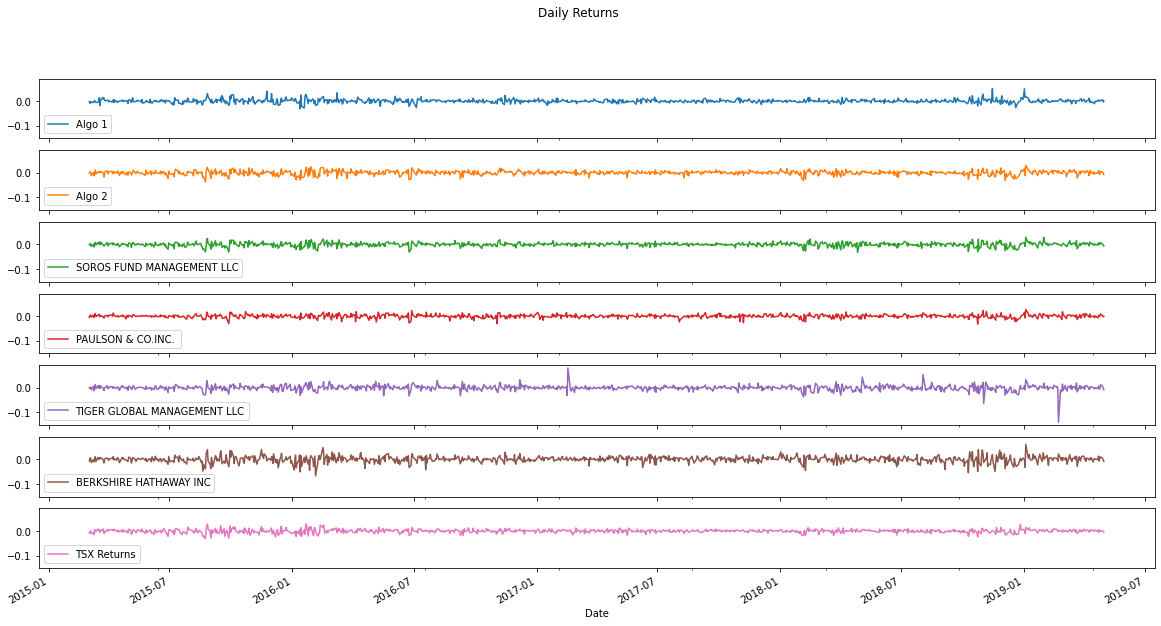

In [18]:
# Plot daily returns of all portfolios
combined_df.plot(subplots=True,figsize=(20, 10), title="Daily Returns",sharey=True)

#### Calculate and Plot cumulative returns.

In [19]:
# Calculate cumulative returns of all portfolios
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()



<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

<Figure size 2520x1800 with 0 Axes>

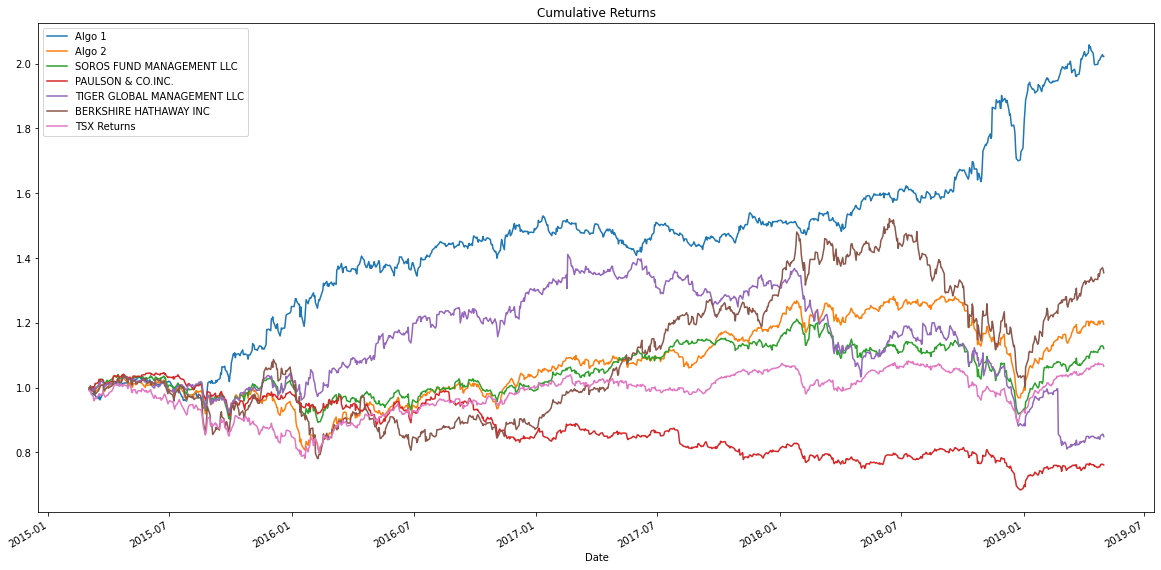

In [20]:
# Plot cumulative returns
from matplotlib.pyplot import figure

figure(figsize=(35, 25))
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


Algo 1                         0.007589
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
dtype: float64

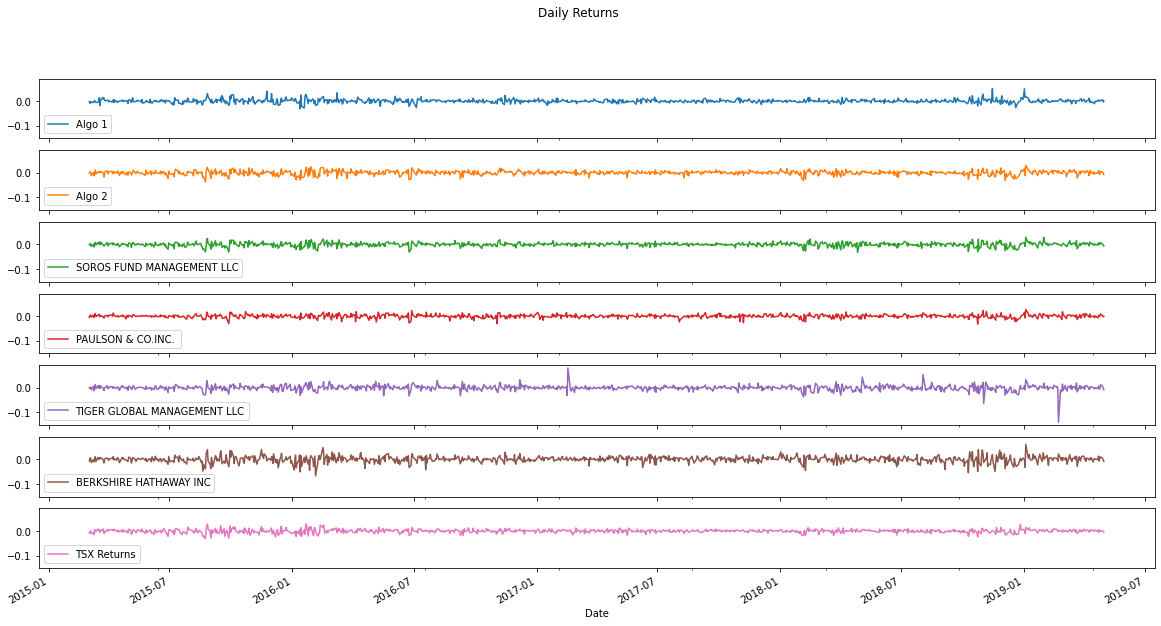

In [21]:
# Box plot to visually show risk
combined_df.plot(subplots=True,figsize=(20, 10), title="Daily Returns",sharey=True)

daily1_std = combined_df.std()
daily1_std.head()



<AxesSubplot:>

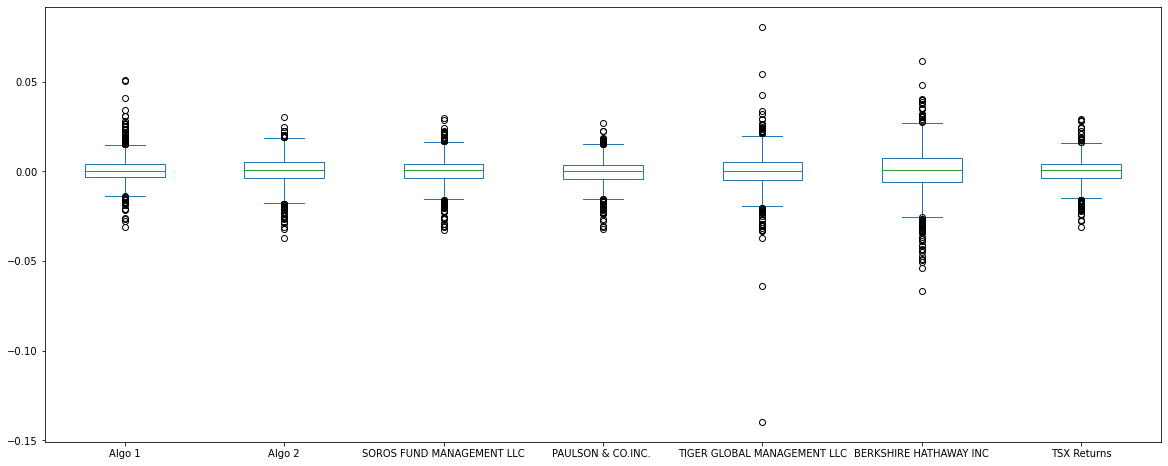

In [22]:
combined_df.plot.box(figsize=(20,8))

### Calculate Standard Deviations

### Determine which portfolios are riskier than the S&P TSX 60

In [23]:
daily1_std = daily1_std.sort_values(ascending=False)
daily1_std.head()

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
dtype: float64

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_history = sp_tsx_history.std()

# Determine which portfolios are riskier than the S&P TSX 60
sp_tsx_history.head()


TSX Returns    0.006637
dtype: float64

In [25]:
print("All portfolios have greater Std Dev than TSX - this makes rational sense since the TSX is a broad based national index")

All portfolios have greater Std Dev than TSX - this makes rational sense since the TSX is a broad based national index


### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily1_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

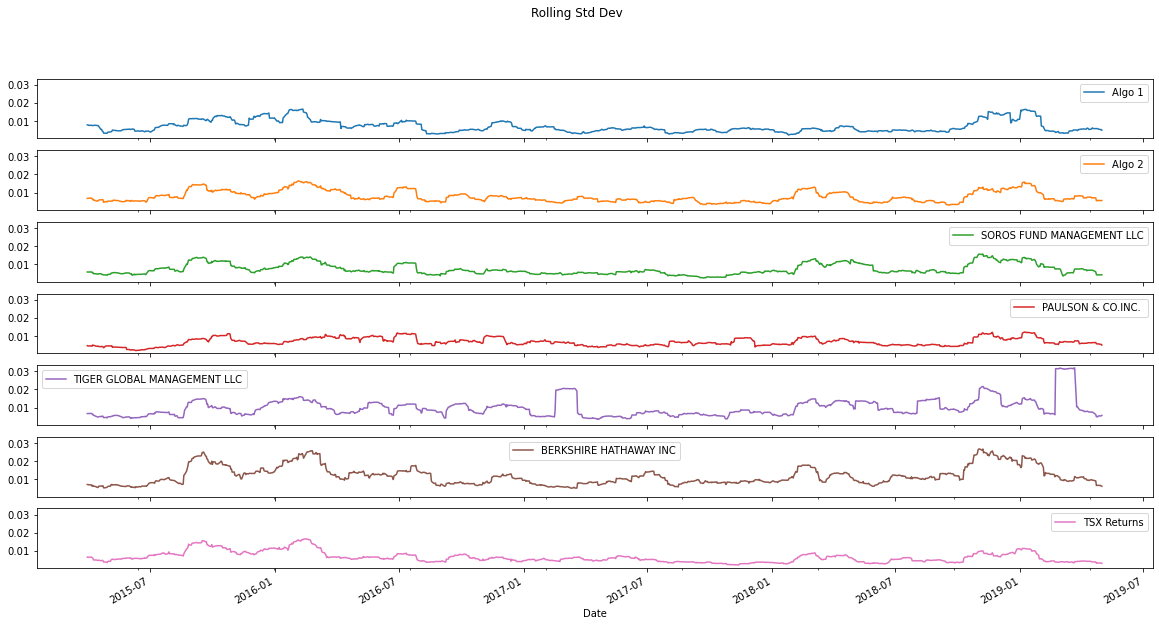

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily1_std * np.sqrt(252)


# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(subplots=True,figsize=(20, 10), title="Rolling Std Dev",sharex=True,sharey=True)

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
correlation = combined_df.corr()
correlation
# Display de correlation matrix


,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,TSX Returns
Algo 1,1.000000,0.285455,0.313795,0.266363,0.161236,0.289378,0.310276
Algo 2,0.285455,1.000000,0.826667,0.674015,0.506689,0.684609,0.737370
SOROS FUND MANAGEMENT LLC,0.313795,0.826667,1.000000,0.697076,0.560964,0.750181,0.673930
PAULSON & CO.INC.,0.266363,0.674015,0.697076,1.000000,0.433034,0.540033,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.161236,0.506689,0.560964,0.433034,1.000000,0.423524,0.440583
BERKSHIRE HATHAWAY INC,0.289378,0.684609,0.750181,0.540033,0.423524,1.000000,0.557250
TSX Returns,0.310276,0.737370,0.673930,0.486511,0.440583,0.557250,1.000000


<AxesSubplot:>

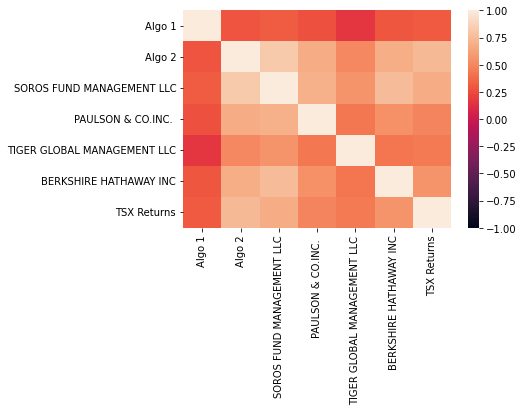

In [29]:
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [30]:

daily_returns = combined_df.pct_change()
daily_returns.head(10)




,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,TSX Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,3.422374,-3.544765,-2.762070,-1.650792,4.113646,-1.641381,-0.604848
2015-03-05,-0.888803,0.789231,0.800968,0.257544,-1.929234,0.596558,-1.398717
2015-03-06,4.190046,-3.650914,-2.968465,-1.876837,-4.601872,-2.947282,-8.420220
2015-03-09,0.098917,-1.113716,-1.073656,-2.182252,-1.688907,-0.873840,-0.342692
2015-03-10,-0.744524,-10.327163,-18.625495,-2.263954,-3.067380,4.893672,1.184814
2015-03-11,-3.151399,-1.049752,-1.390912,-1.966750,-1.274177,-0.882260,-1.464700
2015-03-12,-1.980245,18.292236,1.060018,0.989412,2.960622,-10.419761,-0.678657
2015-03-13,0.847814,-1.433827,-1.302164,-1.139064,-1.281865,-1.753810,-2.241634


In [31]:
# Calculate covariance of a single portfolio
A2_covariance = daily_returns["Algo 2"].cov(daily_returns["TSX Returns"])
print(f"Algo2 covariance:{A2_covariance}")


Algo2 covariance:-16.637072873704327


In [32]:
# Calculate variance of S&P TSX
variance = daily_returns["TSX Returns"].var()
print(f"TSX Var:{variance}")


TSX Var:47118.41366421351


In [33]:
# Computing beta
A2_beta = A2_covariance / variance
# Plot beta trend
print(f"A2 Beta:{A2_beta}")


A2 Beta:-0.00035309068323622706


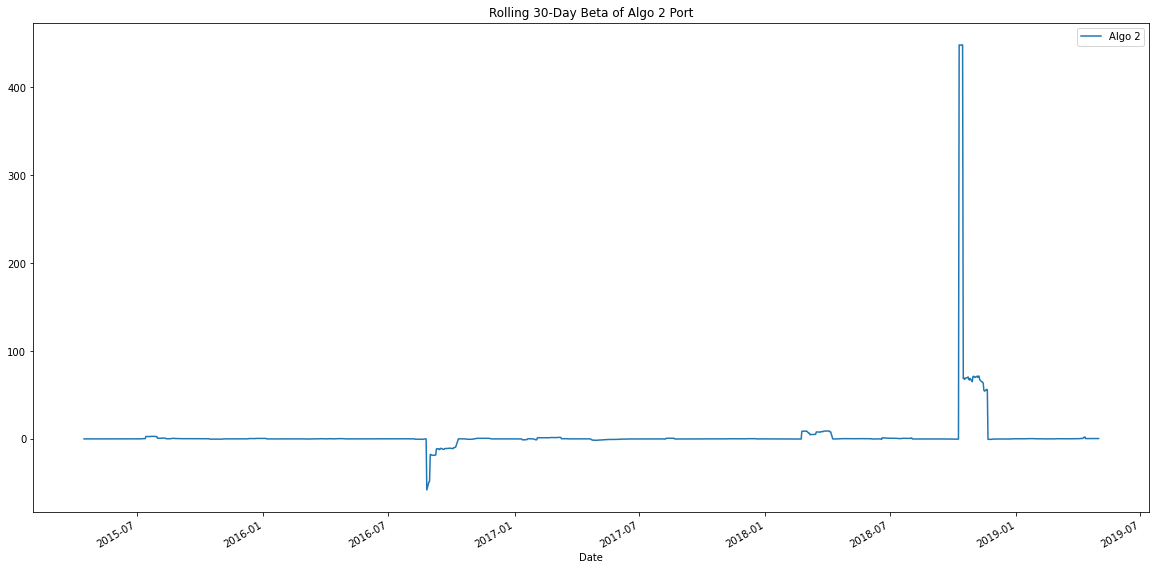

In [34]:
rolling_A2_covariance = daily_returns["Algo 2"].rolling(window=30).cov(daily_returns["TSX Returns"])
rolling_variance = daily_returns["TSX Returns"].rolling(window=30).var()


rolling_A2_beta = rolling_A2_covariance / rolling_variance
ax = rolling_A2_beta.plot(figsize=(20, 10), title="Rolling 30-Day Beta of Algo 2 Port")

# Set the legend of the figure
ax.legend(["Algo 2"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [41]:
# Use `ewm` to calculate the rolling window
times = ['2015-03-03', '2015-03-04', '2015-03-10', '2015-03-13', '2015-03-17', '2015-03-18', '2015-03-19', '2015-03-23', '2015-03-25', '2015-03-27','2015-03-30', '2015-03-31', '2015-04-01', '2015-04-06', '2015-04-07', '2015-04-08', '2015-04-10', '2015-04-13', '2015-04-14', '2015-04-15', '2015-04-20']
daily_returns.ewm(halflife='21 days', times=pd.DatetimeIndex(times)).mean()


ValueError: times must be the same length as the object.

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
#first calculate std deviations 

daily1_std = combined_df.std()

daily1_std.head()



Algo 1                         0.007589
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
dtype: float64

In [36]:
sharpe_ratios = (combined_df.mean() * 252) / (daily1_std * np.sqrt(252))
sharpe_ratios.head

<bound method NDFrame.head of Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
TSX Returns                    0.195550
dtype: float64>

<AxesSubplot:title={'center':'Sharpe Ratios'}>

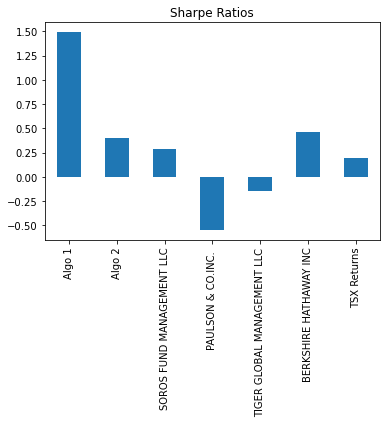

In [37]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [38]:
print("both of the Algo strategies have a higher Sharpe ratio than all but one - Berkshire Hathaway of the other portfolios and the TSX, and therefore the Algo strategies have mostly outperformed")

both of the Algo strategies have a higher Sharpe ratio than all but one - Berkshire Hathaway of the other portfolios and the TSX, and therefore the Algo strategies have mostly outperformed


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [39]:
# Reading data from 1st stock
AMZN_returns_csv = Path("Resources/AMZN_returns.csv")

AMZN_returns = pd.read_csv(AMZN_returns_csv, index_col="Date",parse_dates = True,infer_datetime_format=True)
AMZN_returns.head()

,AMZN
Date,
2015-02-01,308.52
2015-05-01,302.19
2015-06-01,295.29
2015-07-01,298.42
2015-08-01,300.46


In [40]:
# Reading data from 2nd stock

DMP_returns_csv = Path("Resources/DMP_returns.csv")

DMP_returns = pd.read_csv(DMP_returns_csv, index_col="Date",parse_dates = True,infer_datetime_format=True)
DMP_returns.head()

,DMP
Date,
2015-02-01,15.57
2015-05-01,15.52
2015-06-01,15.40
2015-07-01,15.56
2015-08-01,15.69


In [41]:
# Reading data from 3rd stock
TSLA_returns_csv = Path("Resources/TSLA_returns.csv")

TSLA_returns = pd.read_csv(TSLA_returns_csv, index_col="Date",parse_dates = True,infer_datetime_format=True)
TSLA_returns.head()



,TSLA
Date,
2015-02-01,43.86
2015-05-01,42.02
2015-06-01,42.26
2015-07-01,42.19
2015-08-01,42.12


In [42]:
# Reading data from 4th stock
UNH_returns_csv = Path("Resources/UNH_returns.csv")

UNH_returns = pd.read_csv(UNH_returns_csv, index_col="Date",parse_dates = True,infer_datetime_format=True)
UNH_returns.head()

,UNH
Date,
2015-02-01,100.78
2015-05-01,99.12
2015-06-01,98.92
2015-07-01,99.93
2015-08-01,104.70


In [43]:
# Combine all stocks in a single DataFrame
custom_df = pd.concat([AMZN_returns, DMP_returns, TSLA_returns, UNH_returns], axis="columns", join="inner")
# Create a new DataFrame where the columns are the closing prices for each ticker


# Sort datetime index in ascending order (past to present)
custom_df = custom_df.sort_index()

# Set column names
custom_df.columns = ["AMZN", "DMP", "TSLA", "UNH"]

# Display a few rows
custom_df.tail()

,AMZN,DMP,TSLA,UNH
Date,,,,
2018-12-24,1343.96,39.96,59.08,232.94
2018-12-26,1470.90,39.03,65.22,243.35
2018-12-27,1461.64,39.10,63.23,245.97
2018-12-28,1478.02,38.53,66.77,246.24
2018-12-31,1501.97,39.42,66.56,249.12


In [44]:
# Reset Date index
custom_df.reset_index(inplace = True)

   
# display
custom_df.head()


,Date,AMZN,DMP,TSLA,UNH
0,2015-01-04,370.26,23.32,37.52,117.45
1,2015-01-05,422.87,19.00,45.21,113.20
2,2015-01-06,430.92,19.15,49.89,119.86
3,2015-01-07,437.39,16.73,53.83,123.38
4,2015-01-09,496.54,12.40,47.73,112.63


In [45]:
# Reorganize portfolio data by having a column per symbol
#use a pivot table Simplest pivot table must have a dataframe
# and an index/list of index.
table = pd.pivot_table(custom_df, index =['Date', 'AMZN'])
  
table.head()


,,DMP,TSLA,UNH
Date,AMZN,,,
2015-01-04,370.26,23.32,37.52,117.45
2015-01-05,422.87,19.00,45.21,113.20
2015-01-06,430.92,19.15,49.89,119.86
2015-01-07,437.39,16.73,53.83,123.38
2015-01-09,496.54,12.40,47.73,112.63


In [46]:
table = pd.pivot_table(custom_df, index =['Date', 'DMP'])
  
table.head()

,,AMZN,TSLA,UNH
Date,DMP,,,
2015-01-04,23.32,370.26,37.52,117.45
2015-01-05,19.00,422.87,45.21,113.20
2015-01-06,19.15,430.92,49.89,119.86
2015-01-07,16.73,437.39,53.83,123.38
2015-01-09,12.40,496.54,47.73,112.63


In [47]:
table = pd.pivot_table(custom_df, index =['Date', 'TSLA'])
  
table.head()

,,AMZN,DMP,UNH
Date,TSLA,,,
2015-01-04,37.52,370.26,23.32,117.45
2015-01-05,45.21,422.87,19.00,113.20
2015-01-06,49.89,430.92,19.15,119.86
2015-01-07,53.83,437.39,16.73,123.38
2015-01-09,47.73,496.54,12.40,112.63


In [48]:
table = pd.pivot_table(custom_df, index =['Date', 'UNH'])
  
table.head()

,,AMZN,DMP,TSLA
Date,UNH,,,
2015-01-04,117.45,370.26,23.32,37.52
2015-01-05,113.20,422.87,19.00,45.21
2015-01-06,119.86,430.92,19.15,49.89
2015-01-07,123.38,437.39,16.73,53.83
2015-01-09,112.63,496.54,12.40,47.73


In [49]:
custom_df = pd.concat([AMZN_returns, DMP_returns, TSLA_returns, UNH_returns], axis = "columns", join = "inner")
custom_df.head()

,AMZN,DMP,TSLA,UNH
Date,,,,
2015-02-01,308.52,15.57,43.86,100.78
2015-05-01,302.19,15.52,42.02,99.12
2015-06-01,295.29,15.40,42.26,98.92
2015-07-01,298.42,15.56,42.19,99.93
2015-08-01,300.46,15.69,42.12,104.70


In [50]:
# Calculate daily returns
AMZN_returns.dtypes



AMZN    float64
dtype: object

In [51]:
# Drop NA

AMZN_returns = AMZN_returns.dropna()




## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Display sample data
AMZN_returns = AMZN_returns.pct_change()
AMZN_returns.head()

,AMZN
Date,
2015-02-01,NaN
2015-05-01,-0.020517
2015-06-01,-0.022833
2015-07-01,0.010600
2015-08-01,0.006836


In [53]:
DMP_returns.dtypes
# Drop NA



DMP    float64
dtype: object

In [54]:
DMP_returns = DMP_returns.dropna()


In [55]:
TSLA_returns.dtypes
# Drop NA


TSLA    float64
dtype: object

In [56]:
# Display sample data
DMP_returns = DMP_returns.pct_change()
DMP_returns.head()

,DMP
Date,
2015-02-01,NaN
2015-05-01,-0.003211
2015-06-01,-0.007732
2015-07-01,0.010390
2015-08-01,0.008355


In [57]:
TSLA_returns = TSLA_returns.dropna()




In [58]:
# Display sample data
TSLA_returns = TSLA_returns.pct_change()
TSLA_returns.head()

,TSLA
Date,
2015-02-01,NaN
2015-05-01,-0.041952
2015-06-01,0.005712
2015-07-01,-0.001656
2015-08-01,-0.001659


In [59]:
UNH_returns.dtypes
# Drop NA

UNH    float64
dtype: object

In [60]:
UNH_returns = UNH_returns.dropna()

In [61]:

# Display sample data
UNH_returns = UNH_returns.pct_change()
UNH_returns.head()

,UNH
Date,
2015-02-01,NaN
2015-05-01,-0.016472
2015-06-01,-0.002018
2015-07-01,0.010210
2015-08-01,0.047733


In [62]:
custom_returns = custom_df.pct_change()
custom_returns.head()

,AMZN,DMP,TSLA,UNH
Date,,,,
2015-02-01,NaN,NaN,NaN,NaN
2015-05-01,-0.020517,-0.003211,-0.041952,-0.016472
2015-06-01,-0.022833,-0.007732,0.005712,-0.002018
2015-07-01,0.010600,0.010390,-0.001656,0.010210
2015-08-01,0.006836,0.008355,-0.001659,0.047733


In [63]:
custom_returns = custom_returns.dropna().copy()
custom_returns.head(10)

,AMZN,DMP,TSLA,UNH
Date,,,,
2015-05-01,-0.020517,-0.003211,-0.041952,-0.016472
2015-06-01,-0.022833,-0.007732,0.005712,-0.002018
2015-07-01,0.010600,0.010390,-0.001656,0.010210
2015-08-01,0.006836,0.008355,-0.001659,0.047733
2015-09-01,-0.011749,0.007011,-0.018756,-0.009360
2015-12-01,-0.018590,-0.008228,-0.021534,-0.011280
2015-01-13,0.011427,-0.020421,0.010138,0.005071
2015-01-14,-0.004987,0.000000,-0.056548,0.002523
2015-01-15,-0.021550,-0.016287,-0.004411,0.010936


In [64]:
# Set weights
weights = [0.25, 0.25, 0.25, 0.25]

# Use the `dot` function to sum the product each weight and the corresponding stock daily return.
portfolio_returns = custom_returns.dot(weights)
# Rename `Close` Column to be specific to this portfolio.
portfolio_returns.head()


Date
2015-05-01   -0.020538
2015-06-01   -0.006718
2015-07-01    0.007386
2015-08-01    0.015316
2015-09-01   -0.008213
dtype: float64

In [65]:
portfolio_returns = portfolio_returns.dropna()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returnstail

In [66]:
# Join your returns DataFrame to the original returns DataFrame

complete_df = pd.concat([all_portfolios, portfolio_returns], axis="columns", join="inner")
complete_df.head(20)

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,TSX Returns,0
Date,,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530,-0.004093
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972,-0.001985
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,-0.006555,-0.009503
2015-03-11,0.002994,0.000605,0.004012,0.005163,0.003312,-0.001147,0.006655,-0.008085
2015-03-12,-0.002935,0.011667,0.008265,0.010272,0.013117,0.010801,0.002139,-0.010317
2015-03-13,-0.005423,-0.005062,-0.002497,-0.001428,-0.003697,-0.008142,-0.002655,-0.001472
2015-03-16,-0.003395,0.004117,0.007901,0.003583,0.007953,0.008055,0.008910,0.034988
2015-03-17,-0.002822,0.001274,0.002142,0.002928,-0.000687,0.000384,0.002407,-0.010112
2015-03-18,0.014429,0.006269,0.009603,0.007513,0.009557,0.007854,0.004276,0.006623


In [67]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
complete_df = complete_df.dropna()

In [68]:
print(complete_df.columns)

Index([                     'Algo 1',                      'Algo 2',
         'SOROS FUND MANAGEMENT LLC',          'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC',      'BERKSHIRE HATHAWAY INC',
                       'TSX Returns',                             0],
      dtype='object')


In [69]:
complete_df = complete_df.rename(columns={0:"Custom"})
print(complete_df.columns)
complete_df.head()

Index(['Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'TSX Returns',
       'Custom'],
      dtype='object')


,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,TSX Returns,Custom
Date,,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530,-0.004093
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972,-0.001985
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,-0.006555,-0.009503
2015-03-11,0.002994,0.000605,0.004012,0.005163,0.003312,-0.001147,0.006655,-0.008085
2015-03-12,-0.002935,0.011667,0.008265,0.010272,0.013117,0.010801,0.002139,-0.010317


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [70]:


# start with daily Std Dev 
dailycustom_std = custom_returns.std().copy()
dailycustom_std


AMZN    0.019301
DMP     0.022503
TSLA    0.027560
UNH     0.013131
dtype: float64

In [71]:
# Calculate the annualized `std'using 252 day 
anncustom_std = dailycustom_std * np.sqrt(252)
anncustom_std

AMZN    0.306390
DMP     0.357231
TSLA    0.437505
UNH     0.208455
dtype: float64

In [72]:
custom_returns.dtypes

AMZN    float64
DMP     float64
TSLA    float64
UNH     float64
dtype: object

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Std Dev Custom'}, xlabel='Date'>

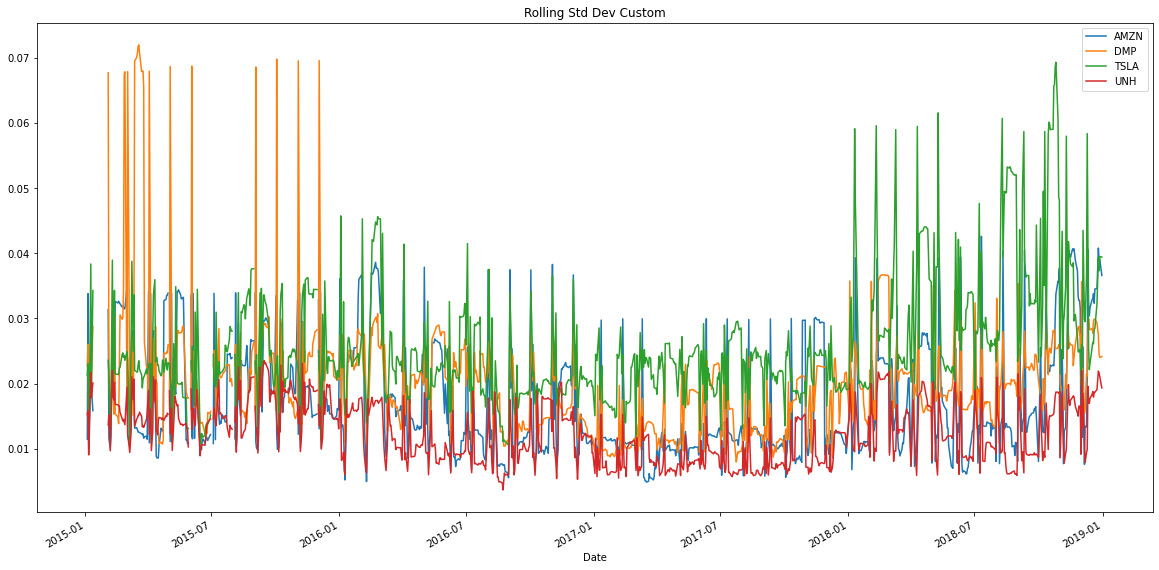

In [82]:
# Calculate rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rollingcustom_std = custom_returns.rolling(window=21).std()


# Plot the rolling standard deviation
rollingcustom_std.plot(figsize=(20, 10), title="Rolling Std Dev Custom")
# Plot rolling standard deviation


### Calculate and plot the correlation

In [83]:
# Calculate and plot the correlation
correlation1 = custom_df.corr()
correlation1

,AMZN,DMP,TSLA,UNH
AMZN,1.000000,0.930941,0.671632,0.966307
DMP,0.930941,1.000000,0.632222,0.920090
TSLA,0.671632,0.632222,1.000000,0.765982
UNH,0.966307,0.920090,0.765982,1.000000


<AxesSubplot:>

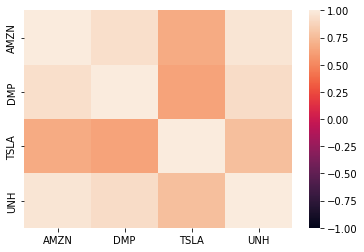

In [84]:
sns.heatmap(correlation1, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [88]:
# Calculate variance of S&P TSX
variance = complete_df["TSX Returns"].rolling(window=60).var()
print(f"TSX Var:{variance}")

TSX Var:Date
2015-03-03         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-11         NaN
2015-03-12         NaN
                ...   
2018-12-21    0.000068
2018-12-24    0.000069
2018-12-27    0.000084
2018-12-28    0.000084
2018-12-31    0.000086
Name: TSX Returns, Length: 838, dtype: float64


In [90]:

custom_covariance = complete_df["Custom"].rolling(window=60).cov(complete_df["TSX Returns"])
print(f"Custom covariance:{custom_covariance}")


Custom covariance:Date
2015-03-03         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-11         NaN
2015-03-12         NaN
                ...   
2018-12-21    0.000071
2018-12-24    0.000074
2018-12-27    0.000071
2018-12-28    0.000073
2018-12-31    0.000075
Length: 838, dtype: float64


In [91]:
# Computing beta
custom_beta = custom_covariance / variance

print(f"Custom Beta:{custom_beta}")


Custom Beta:Date
2015-03-03         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-11         NaN
2015-03-12         NaN
                ...   
2018-12-21    1.043101
2018-12-24    1.078541
2018-12-27    0.851760
2018-12-28    0.868003
2018-12-31    0.876596
Length: 838, dtype: float64


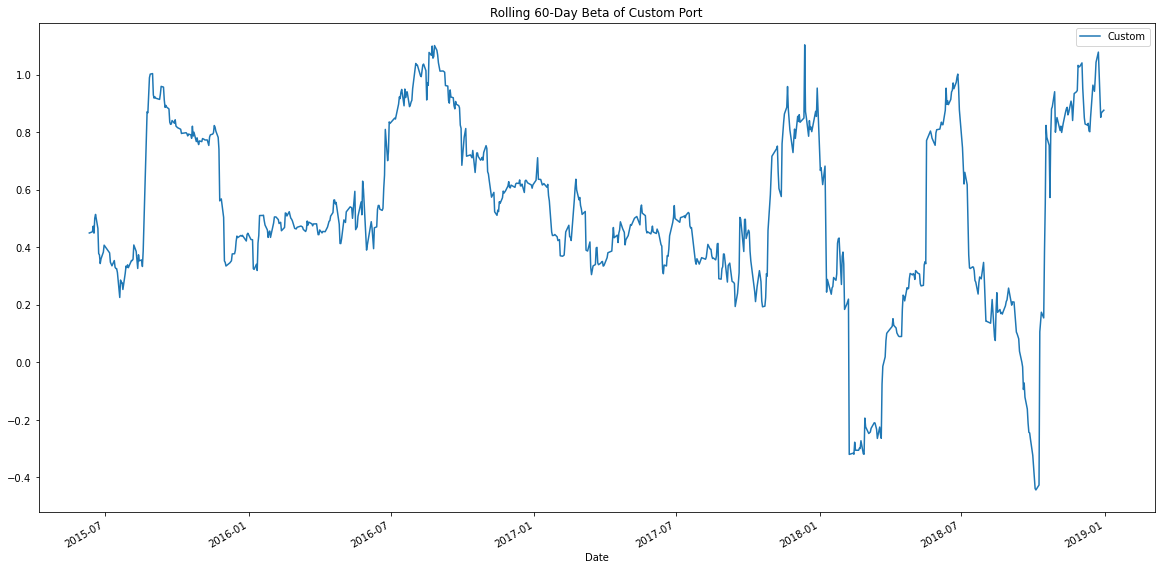

In [92]:
# Calculate and plot Beta

ax = custom_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of Custom Port")

# Set the legend of the figure
ax.legend(["Custom"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [94]:
customport_std = portfolio_returns.std()
customport_std



0.012492748958669005

In [98]:
# Calculate Annualized Sharpe Ratios
csharpe_ratios = (custom_df.mean() * 252) / (customport_std * np.sqrt(252))
csharpe_ratios.head()

AMZN    1.202305e+06
DMP     3.087326e+04
TSLA    6.805135e+04
UNH     2.179429e+05
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

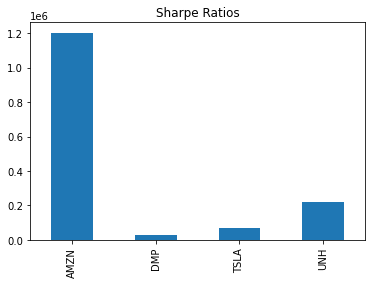

In [99]:
csharpe_ratios.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [101]:
print("The portfolio is constituted of 4 stocks that have all performed well relative to the risk inherent in the holding - A mix with more Tesla and United Health would have given the portfolio greater risk but also greater reward")
      


The portfolio is constituted of 4 stocks that have all performed well relative to the risk inherent in the holding - A mix with more Tesla and United Health would have given the portfolio greater risk but also greater reward
